# The spark foundation

## Task 4 : exploratory data analysis = terrorism

### Dataset link : https://bit.ly/2TK5Xn5

# Name of the author : Parth Sevak

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings as wg 
wg.filterwarnings("ignore")

In [21]:
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding = "ISO-8859-1")

In [22]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [23]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [25]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
df.shape

(181691, 135)

In [38]:
null_values = df.isnull().sum()

In [39]:
print(null_values.head(135))

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


In [40]:
df2 = df[["iyear", "imonth", "country_txt", "region_txt", "provstate", "city", "attacktype1_txt", "targtype1_txt", "targsubtype1_txt", "corp1", "natlty1_txt", "gname", "weaptype1_txt", "weapsubtype1_txt", "nkill", "nwound"]] 

In [41]:
df2.head()

,iyear,imonth,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,targsubtype1_txt,corp1,natlty1_txt,gname,weaptype1_txt,weapsubtype1_txt,nkill,nwound
0,1970,7,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,NaN,Dominican Republic,MANO-D,Unknown,NaN,1.0,0.0
1,1970,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,Belgium,23rd of September Communist League,Unknown,NaN,0.0,0.0
2,1970,1,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Voice of America,United States,Unknown,Unknown,NaN,1.0,0.0
3,1970,1,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,NaN,United States,Unknown,Explosives,Unknown Explosive Type,NaN,NaN
4,1970,1,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,NaN,United States,Unknown,Incendiary,NaN,NaN,NaN


In [42]:
df2.shape

(181691, 16)

In [ ]:
df2.to_csv("df2_clean.csv")

In [2]:
df2 = pd.read_csv("df2_clean.csv")

In [3]:
df2.shape

(181691, 17)

In [4]:
df2.corr()

,Unnamed: 0,iyear,imonth,nkill,nwound
Unnamed: 0,1.000000,0.955888,0.034361,0.015216,0.008508
iyear,0.955888,1.000000,0.000139,0.015341,0.015273
imonth,0.034361,0.000139,1.000000,0.003463,0.002938
nkill,0.015216,0.015341,0.003463,1.000000,0.534375
nwound,0.008508,0.015273,0.002938,0.534375,1.000000


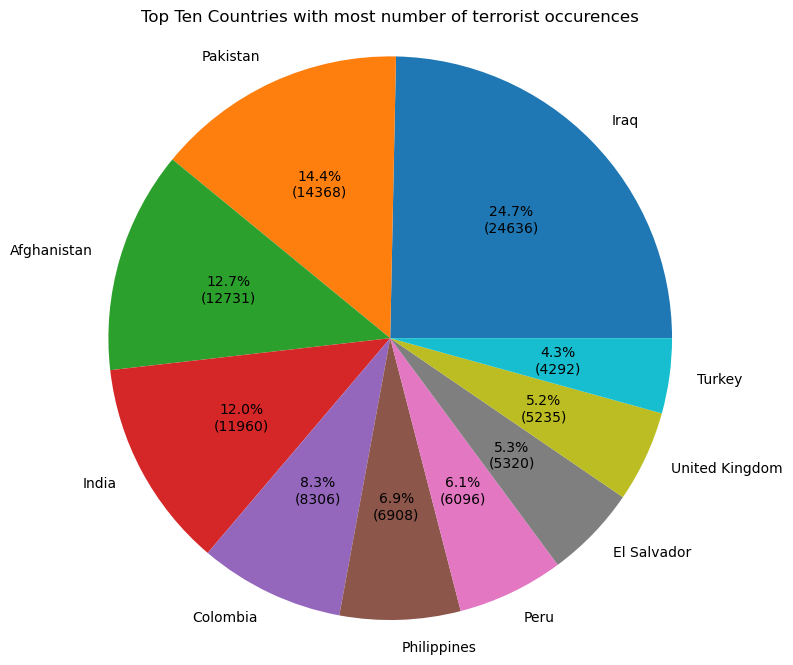

In [10]:

# Calculate the value counts for the 'country_txt' column
country_counts = df2["country_txt"].value_counts()

# Take the top ten countries
top_ten_countries = country_counts.head(10)

# Plot a pie chart with counts displayed directly on the chart
plt.figure(figsize=(8, 8))
plt.pie(top_ten_countries, labels=top_ten_countries.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(top_ten_countries) / 100))
plt.title("Top Ten Countries with most number of terrorist occurences")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


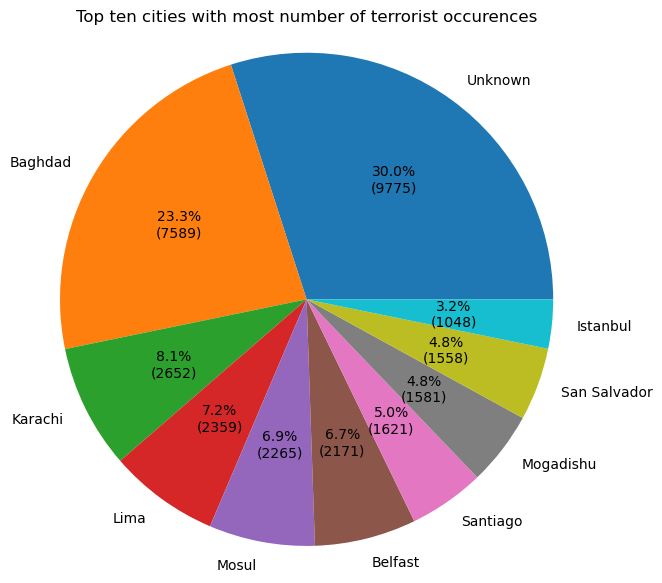

In [13]:
city_counts = df2["city"].value_counts()
top_ten_cities = city_counts.head(10)
plt.figure(figsize=(7,7))
plt.pie(top_ten_cities, labels = top_ten_cities.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(top_ten_cities) / 100))
plt.title("Top ten cities with most number of terrorist occurences")
plt.axis("equal")
plt.show()

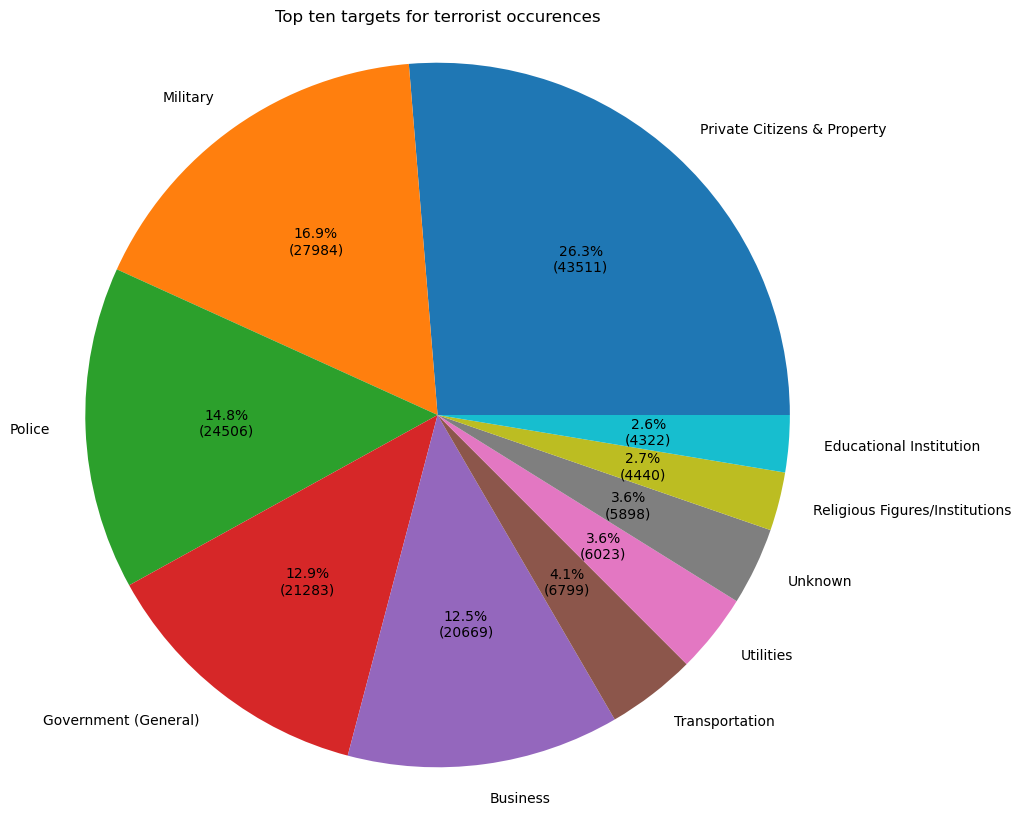

In [19]:
target_on = df2["targtype1_txt"].value_counts()
top_ten_targets = target_on.head(10)
plt.figure(figsize=(10,10))
plt.pie(top_ten_targets, labels = top_ten_targets.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(top_ten_targets) / 100))
plt.title("Top ten targets for terrorist occurences")
plt.axis("equal")
plt.show()

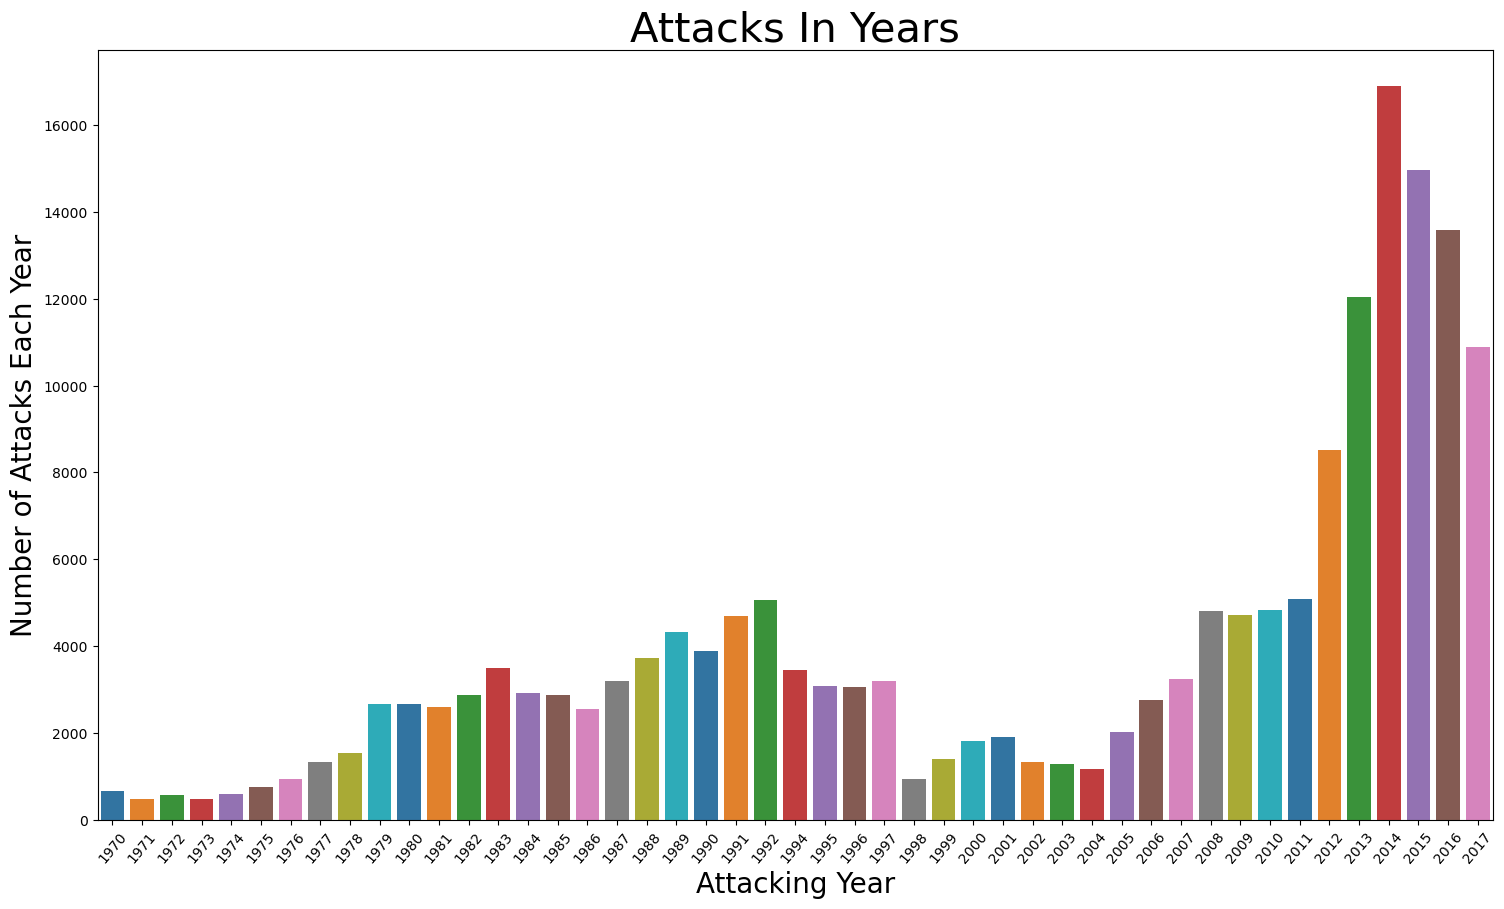

In [3]:
#Terror Attacks In Years
year = df2['iyear'].unique()
years_count = df2['iyear'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()

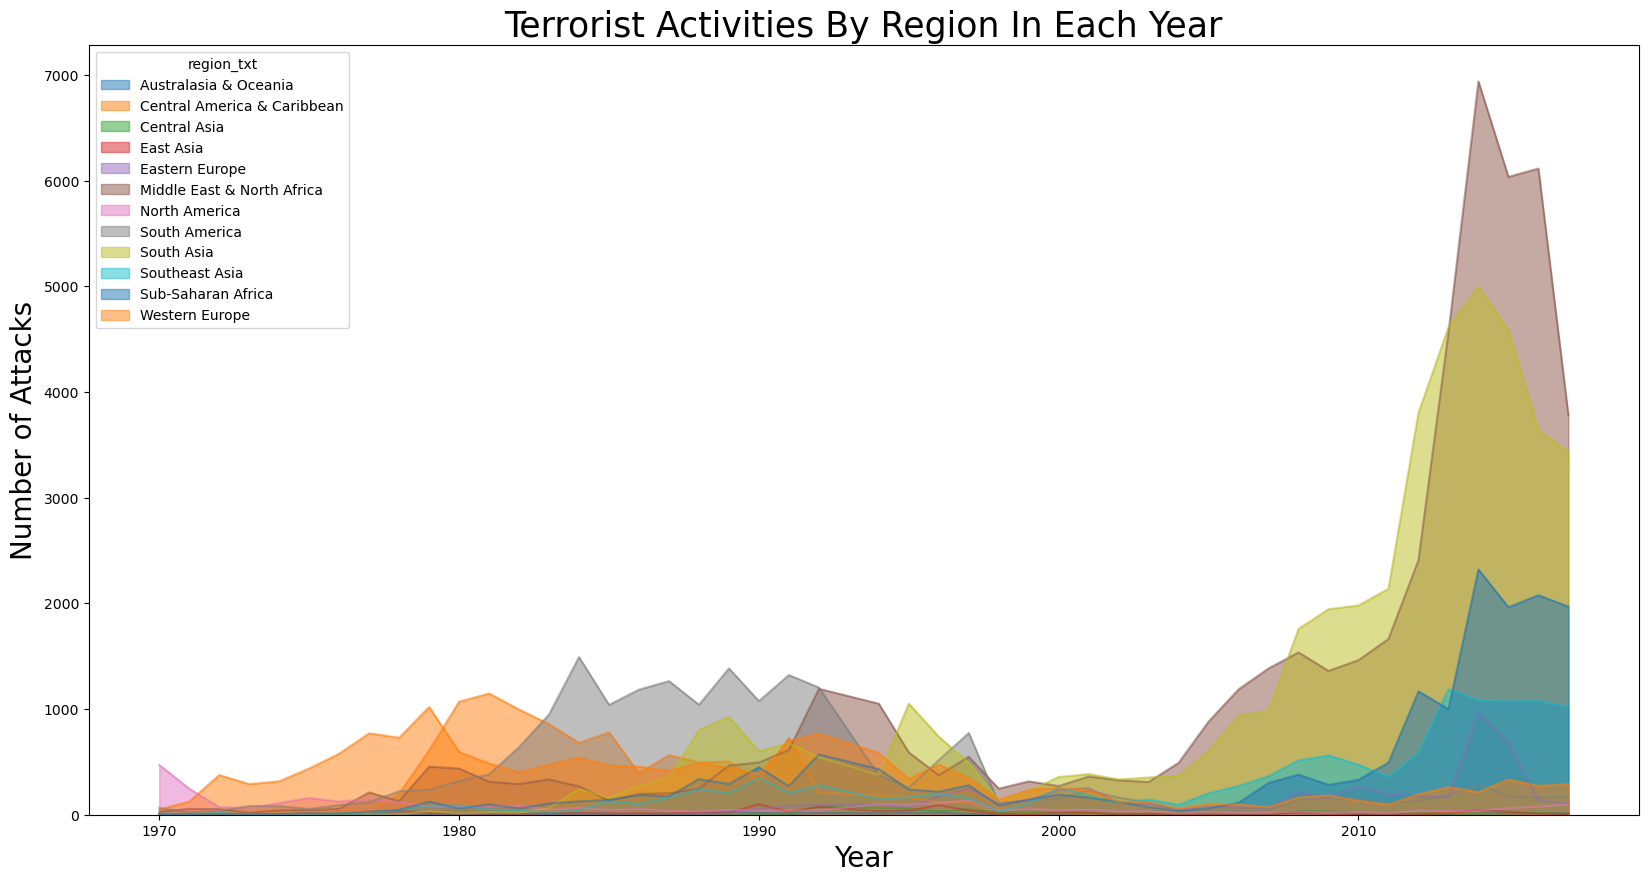

In [5]:

#Terrorist attacks region-wise and year-wise
pd.crosstab(df2.iyear, df2.region_txt).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

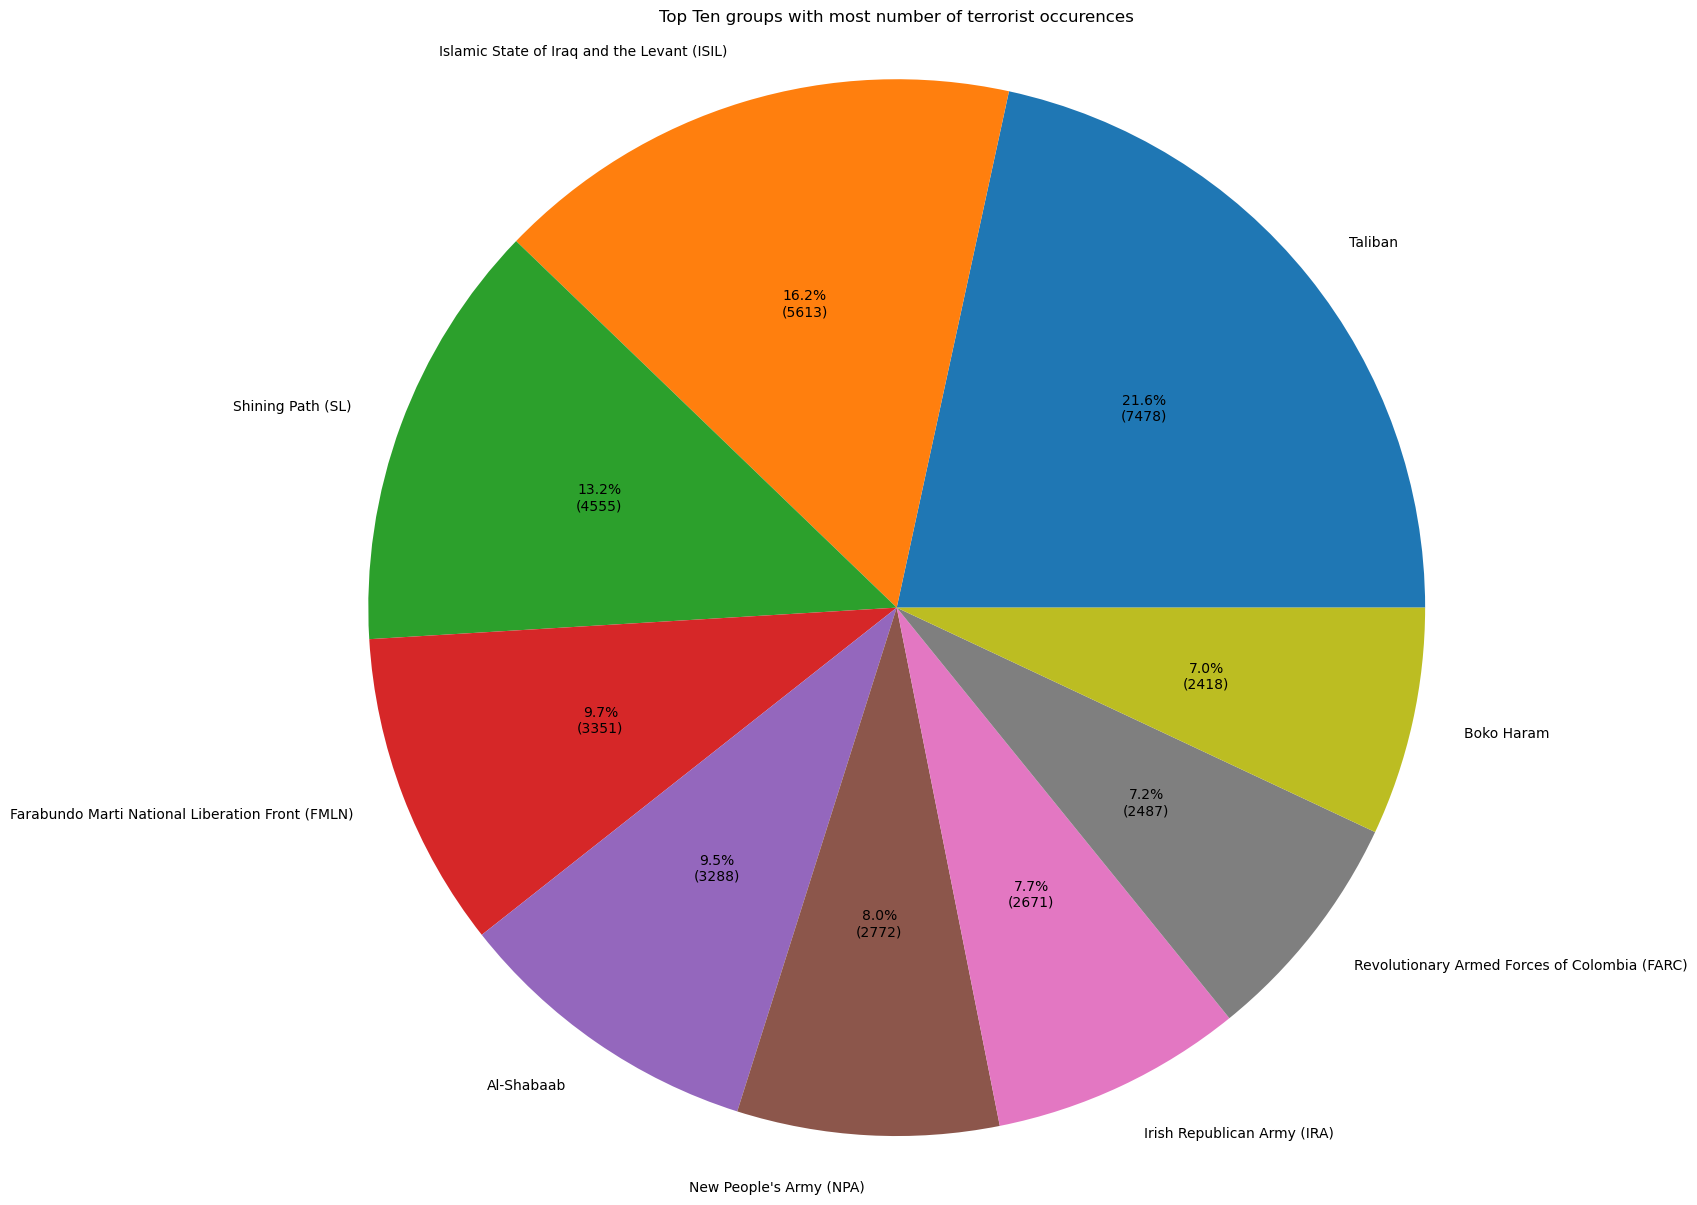

In [21]:

# Calculate the value counts for the 'gname' column
gname_counts = df2["gname"].value_counts()[1:10]

# Take the top ten groups
top_ten_groups = gname_counts.head(10)

# Plot a pie chart with counts displayed directly on the chart
plt.figure(figsize=(15, 15))
plt.pie(top_ten_groups, labels=top_ten_groups.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(top_ten_groups) / 100))
plt.title("Top Ten groups with most number of terrorist occurences")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


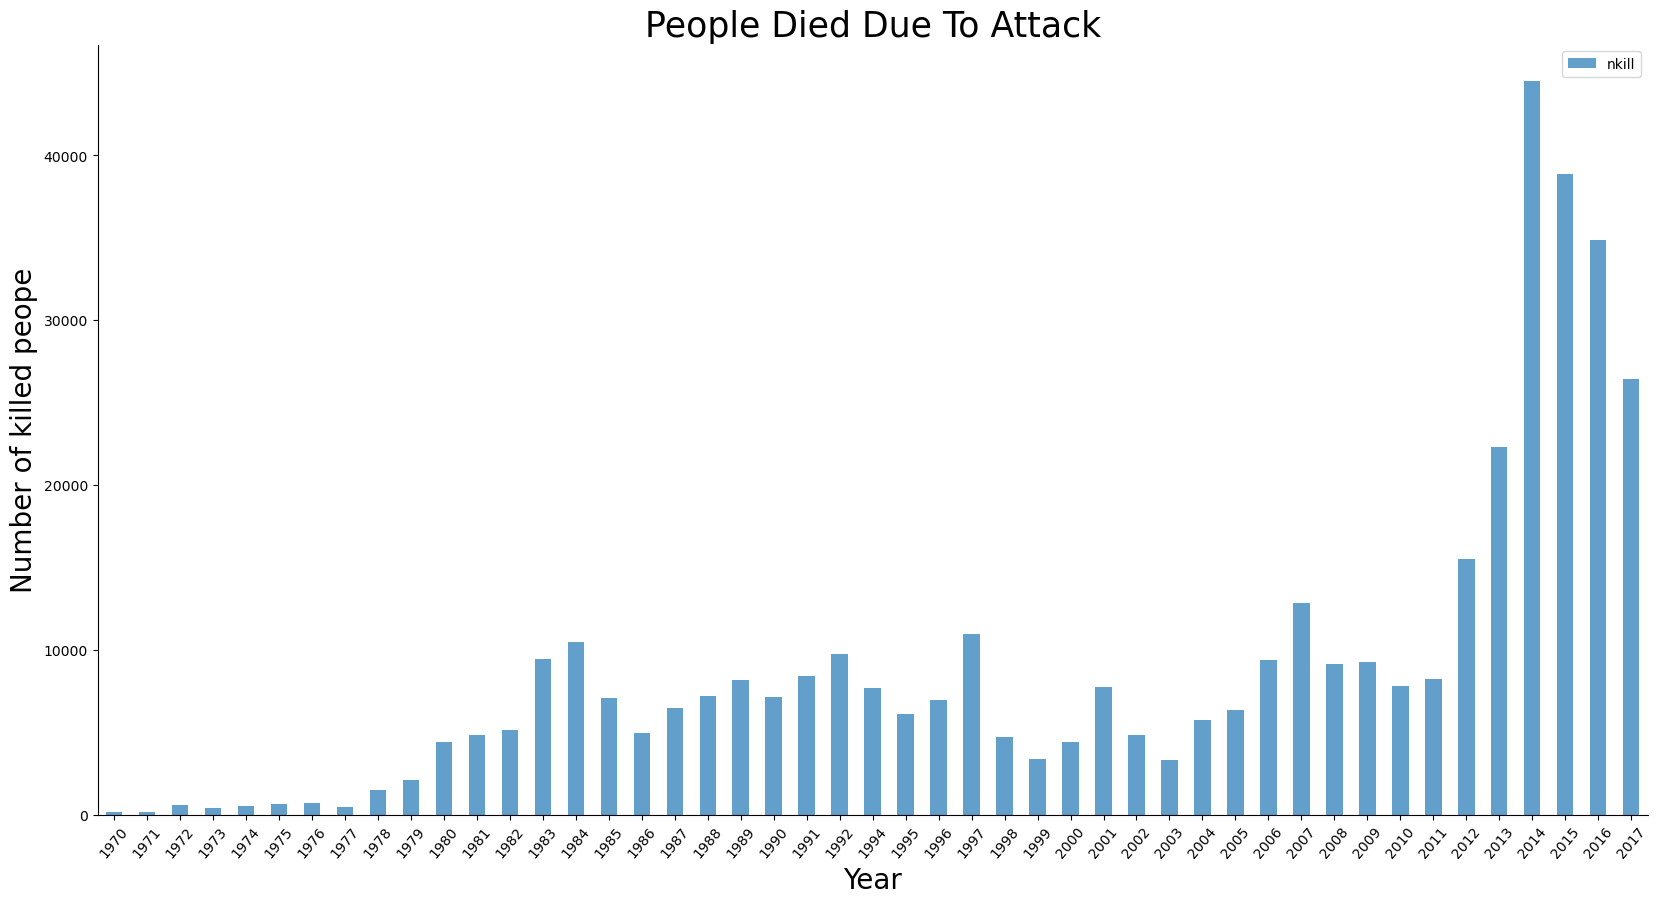

In [10]:
# No. Of People Died Due To Attack Year-Wise
dataKill = df2[['iyear','nkill']].groupby(['iyear']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
dataKill.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.ylabel("Number of killed peope",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

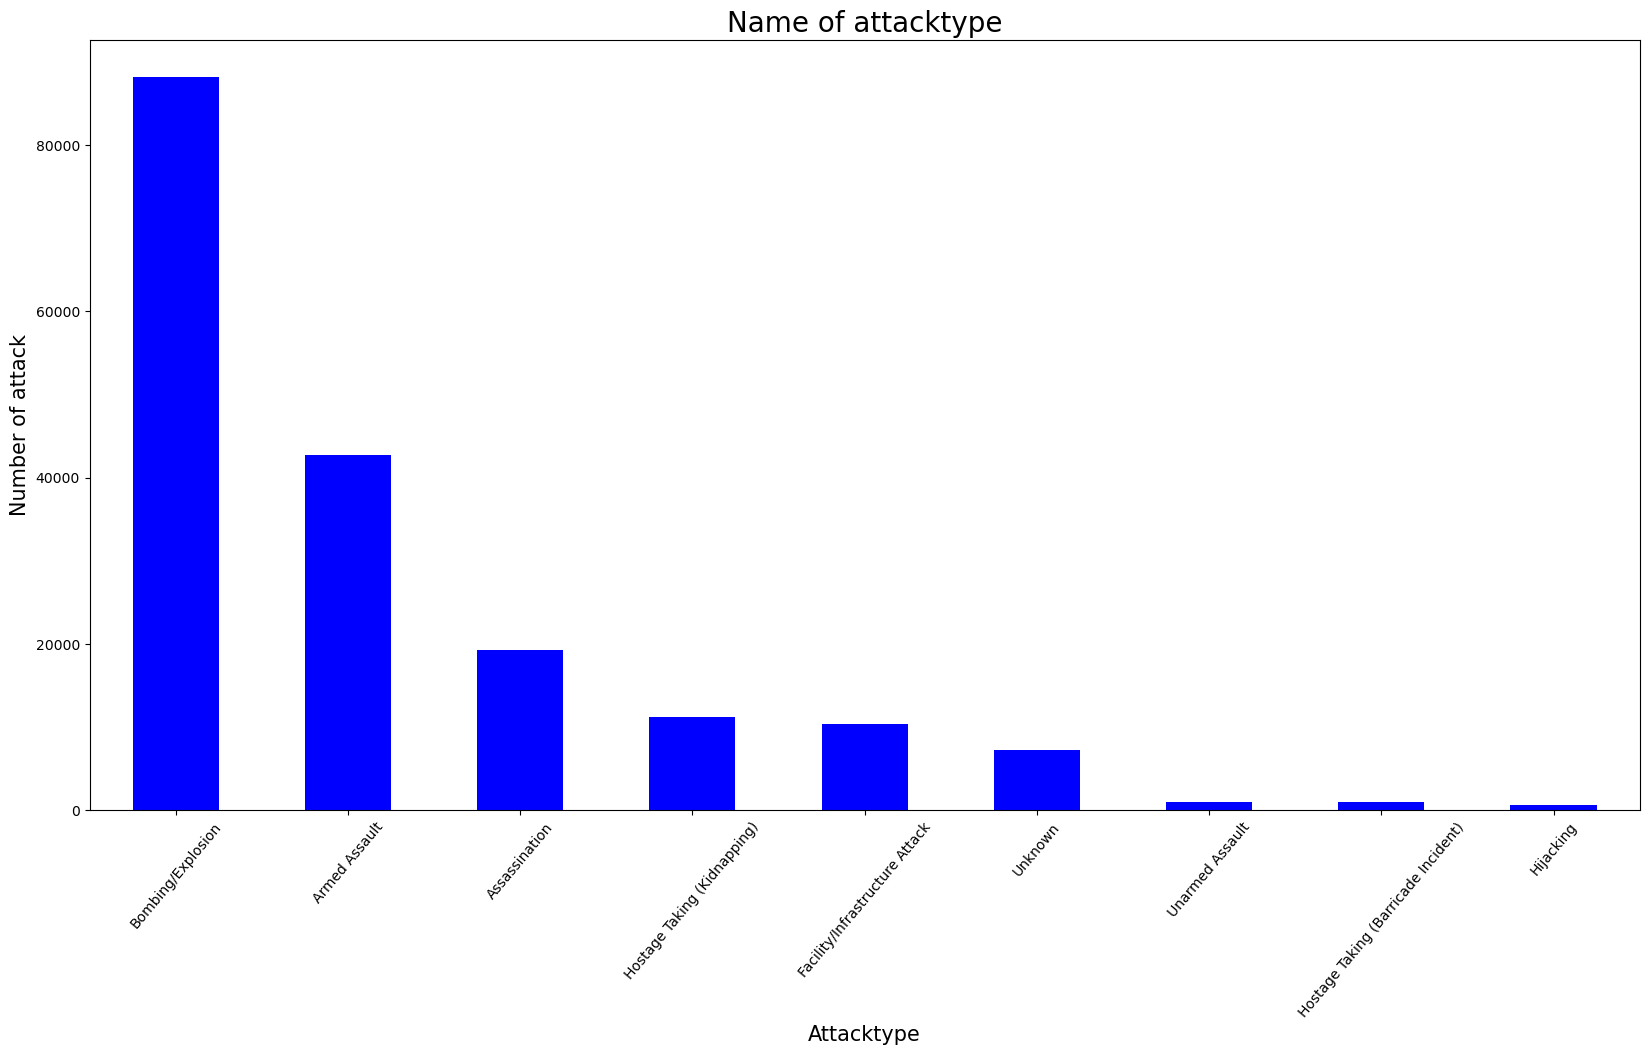

In [11]:
#Name of Attack Type Vs Number Of Attacks
df2['attacktype1_txt'].value_counts().plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation = 50)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Name of attacktype",fontsize=20)
plt.show()

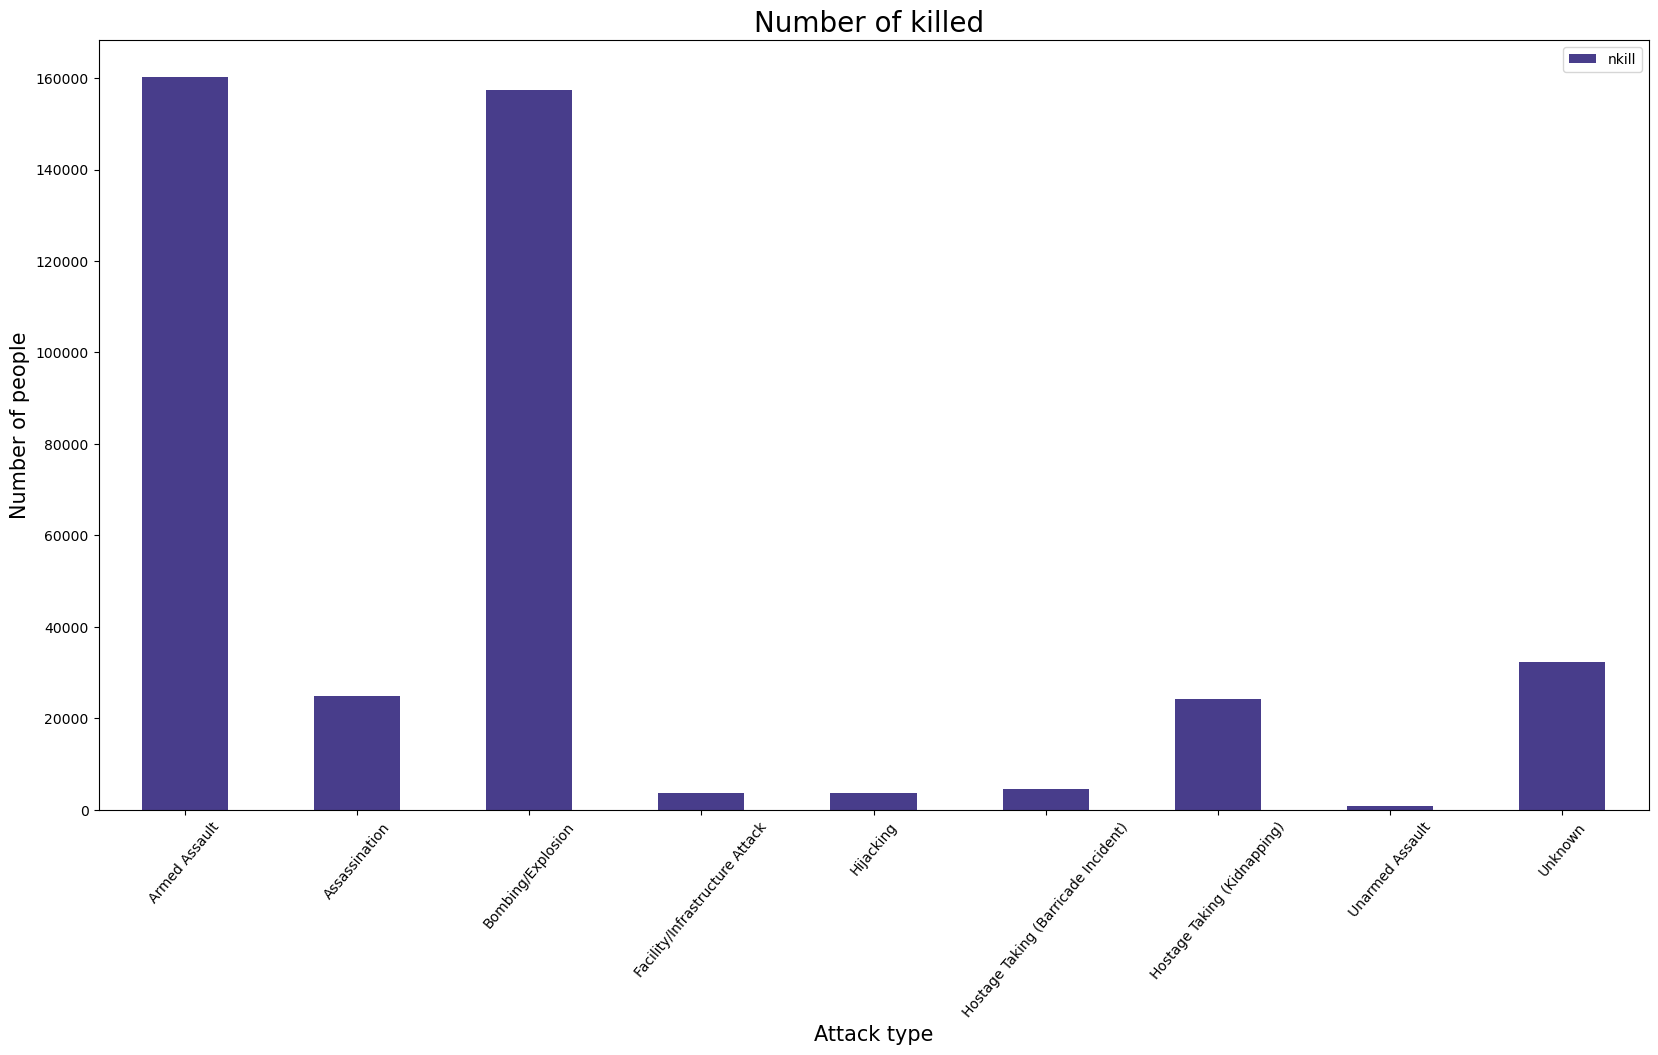

In [12]:
#Number of People Killed VS Attack Type
df2[['attacktype1_txt','nkill']].groupby(["attacktype1_txt"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['darkslateblue'])
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

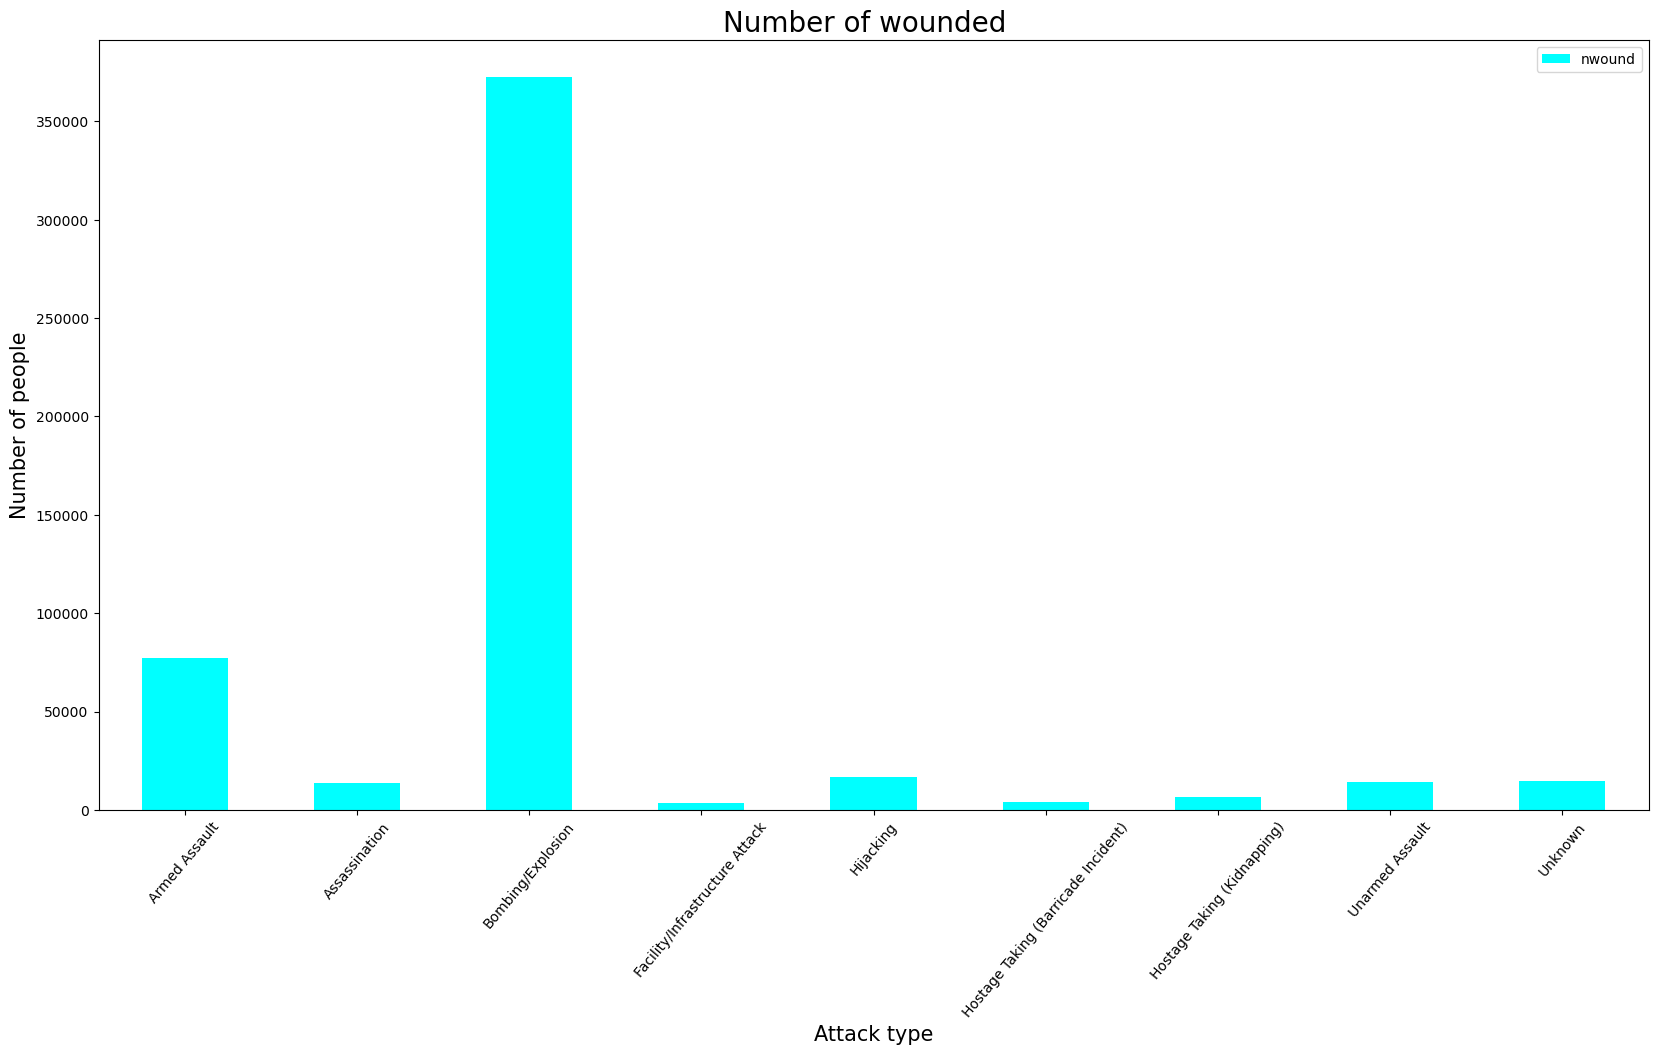

In [14]:
# Number Of People Wounded VS Attack Type
df2[['attacktype1_txt','nwound']].groupby(["attacktype1_txt"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['cyan'])
plt.xticks(rotation=50)
plt.title("Number of wounded  ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

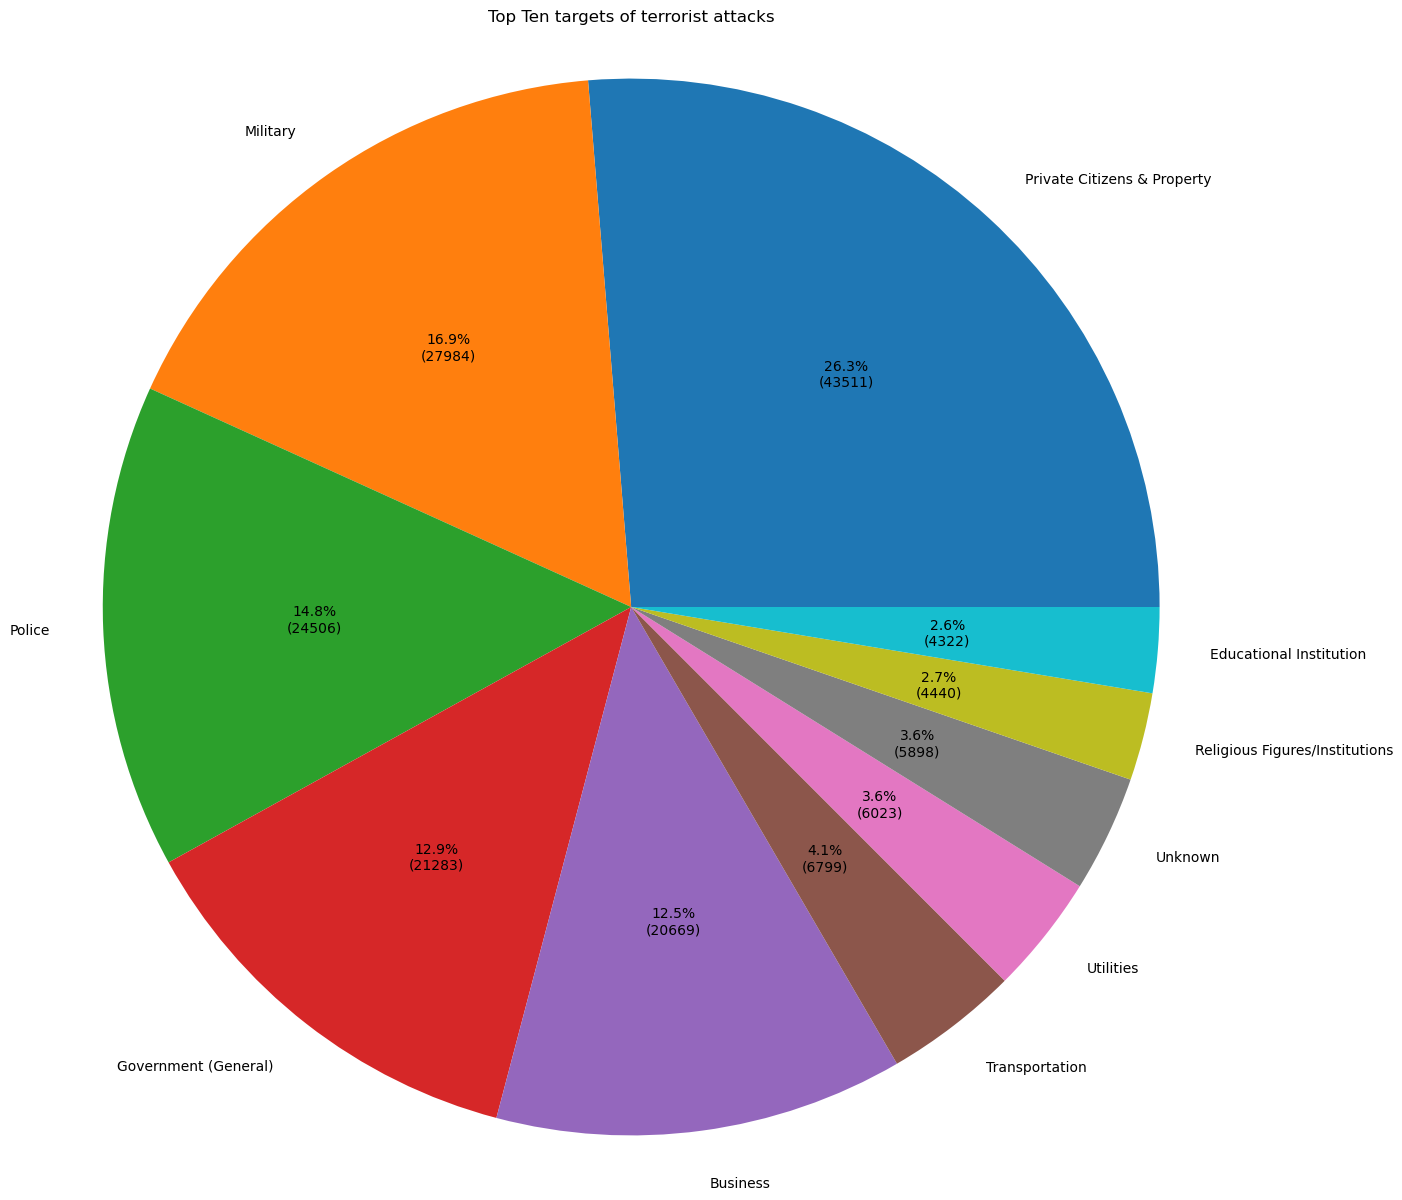

In [20]:

# Calculate the value counts for the 'targtype1_txt' column
target_counts = df2["targtype1_txt"].value_counts()

# Take the top ten targets
top_ten_targets = target_counts.head(10)

# Plot a pie chart with counts displayed directly on the chart
plt.figure(figsize=(15, 15))
plt.pie(top_ten_targets, labels=top_ten_targets.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(top_ten_targets) / 100))
plt.title("Top Ten targets of terrorist attacks")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [25]:
data=df2[['gname','country_txt','nkill']]
data=data.groupby(['gname','country_txt'],axis=0).sum().sort_values('nkill',ascending=False).drop('Unknown').reset_index().head(10)
data

,gname,country_txt,nkill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


In [26]:
kill = df2.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))

Number of people killed by terror attack: 411868


In [27]:
typeKill = df2.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKill

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


## Conclusion and results

1. Country with most attacks - iraq
2. City with most attacks - baghdad
3. Region with most attacks - middle east and north africa
4. Year with the most attacks - 2014
5. Month with the most attacks - may
6. Group with the most attacks - taliban
7. Most attack types - bombing/explosion